In [1]:
import sys
sys.path.append("../../src")

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
REPORT = True
if REPORT:
    sns.set(font_scale=1.5)

## Load and preprocess data

In [5]:
import data

In [6]:
# set db path hackily
data._get_connection("../../data/participants.db")

raw_df = data.get_trials_df(data.load_raw_results(),
                            ("experiment_id", "materials_id", "item_id", "condition_id"))

response_df = raw_df[(raw_df.experiment_id == "09_comprehension_swarm-full-nonalternating-control") & (raw_df.trial_type == "html-slider-response-with-copout")]

Missing datastring for uid A1I3TPX8GA7ISU:3634BBTX0PI2DDMJKQL1T7BJTU3IF4. Status was 1.
Missing datastring for uid A33LYSCQQU1YDJ:31JLPPHS2VIHTNHTYQX3Y0LM83NO3X. Status was 1.
Missing datastring for uid debugL9306E:debugJT1KTE. Status was 1.
Missing datastring for uid A1VWP7HOSGKATD:37WLF8U1WQEX0FJWJ038YMGXYHE6KK. Status was 1.
Missing datastring for uid A6QDP0HAGE9W5:3V0Z7YWSIZONYPU7V25CAIA2YANV2I. Status was 1.
Missing datastring for uid A19VDBNACNJNI8:3ZY8KE4ISKR4Q8WSXDVD6085GQIQVU. Status was 1.
Missing datastring for uid AQ5TMPEPN5UIP:3QUO65DNQVC1SHUCDAT4L9BMNIZUO9. Status was 1.
Missing datastring for uid A3I1W58P6SIV26:3LEP4MGT3HOVSLUHNAYT5P7ZWFIBD3. Status was 1.
Missing datastring for uid A3V4AW6DGWBHDO:3ERET4BTVNXKIYLUH76KIW70TBHK9X. Status was 1.
Missing datastring for uid A12VDN3TJJCAQQ:33TIN5LC05YF23ABLM7BR4MBRUY9YX. Status was 1.
Missing datastring for uid A11EMV89KB6OCM:3DL65MZB8E3JUW0NX558MRV3F30EC8. Status was 1.
Missing datastring for uid A1HRH92NH49RX2:3Z4GS9HPNWYS90

In [7]:
# Drop dupes.
print(f"Dropping {response_df.index.duplicated().sum()} dupe results.")
response_df = response_df[~response_df.index.duplicated()]

Dropping 0 dupe results.


In [8]:
# Expand condition data
response_df = pd.concat([response_df,
                         response_df.condition_id.apply(pd.Series).rename(columns=lambda k: f"condition_{k}")],
                        axis=1) \
    .drop(columns="condition_id")

In [9]:
# Convert condition_id to independent features
response_df["agent_is_given"] = response_df["condition_0"] == 0
response_df["agent_is_subject"] = response_df["condition_1"].map({0: False, 1: True, 2: None})
response_df["is_nonalternating_control"] = response_df["condition_1"] == 2

In [10]:
# Norm slider values within-subject.
response_df["slider_value_normed"] = \
    response_df.groupby("uniqueid").slider_value.apply(lambda xs: (xs - xs.mean()) / xs.std())

In [11]:
# dtype fixes
response_df["slider_copout"] = response_df.slider_copout.astype(bool)
response_df["dateTime"] = pd.to_datetime(response_df.dateTime, unit="ms")

In [12]:
response_df.head()

,,condition,counterbalance,assignmentId,workerId,hitId,trial_type,rt,internal_node_id,dateTime,experiment_id,...,slider_copout,response,image_copout,condition_0,condition_1,condition_2,agent_is_given,agent_is_subject,is_nonalternating_control,slider_value_normed
trial_index,uniqueid,,,,,,,,,,,,,,,,,,,,,
3,debugA7IT33:debugOUPLZ0,0,0,debugOUPLZ0,debugA7IT33,debugDH45XN,html-slider-response-with-copout,1662.0,0.0-3.0,2021-10-22 18:18:16.701,09_comprehension_swarm-full-nonalternating-con...,...,True,NaN,NaN,practice,solid,full,False,NaN,False,NaN
4,debugA7IT33:debugOUPLZ0,0,0,debugOUPLZ0,debugA7IT33,debugDH45XN,html-slider-response-with-copout,1019.4,0.0-4.0,2021-10-22 18:18:17.725,09_comprehension_swarm-full-nonalternating-con...,...,True,NaN,NaN,practice,liquid,full,False,NaN,False,NaN
5,debugA7IT33:debugOUPLZ0,0,0,debugOUPLZ0,debugA7IT33,debugDH45XN,html-slider-response-with-copout,837.1,0.0-5.0,2021-10-22 18:18:18.566,09_comprehension_swarm-full-nonalternating-con...,...,True,NaN,NaN,practice,abstract,empty,False,NaN,False,NaN
6,debugA7IT33:debugOUPLZ0,0,0,debugOUPLZ0,debugA7IT33,debugDH45XN,html-slider-response-with-copout,1097.9,0.0-6.0,2021-10-22 18:18:19.669,09_comprehension_swarm-full-nonalternating-con...,...,True,NaN,NaN,practice,solid,empty,False,NaN,False,NaN
7,debugA7IT33:debugOUPLZ0,0,0,debugOUPLZ0,debugA7IT33,debugDH45XN,html-slider-response-with-copout,751.2,0.0-7.0,2021-10-22 18:18:20.424,09_comprehension_swarm-full-nonalternating-con...,...,True,NaN,NaN,practice,abstract,full,False,NaN,False,NaN


In [13]:
response_df.to_csv("raw_responses.csv")

## Preliminaries

In [14]:
N = len(response_df.reset_index().uniqueid.unique())
N

1

### Demo

In [15]:
qualitative_df = raw_df[(raw_df.experiment_id == "09_comprehension_swarm-full-nonalternating-control") & raw_df.trial_type.isin(("survey-text", "survey-multi-choice"))]

<AxesSubplot:xlabel='survey_answer', ylabel='Count'>

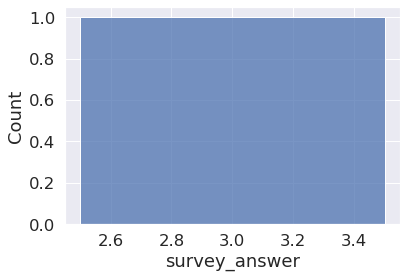

In [16]:
ages = qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id == "0.0-0.0")].survey_answer.astype(int)
sns.histplot(ages)

In [17]:
education = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 0)].survey_answer
education.value_counts()

Master's degree    1
Name: survey_answer, dtype: int64

In [18]:
native = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 1)].survey_answer
native.value_counts()

Yes    1
Name: survey_answer, dtype: int64

### Comments

In [19]:
list(qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id != "0.0-0.0")].survey_answer)

['']

### Total times

Text(0.5, 1.0, 'Total study time (minutes)')

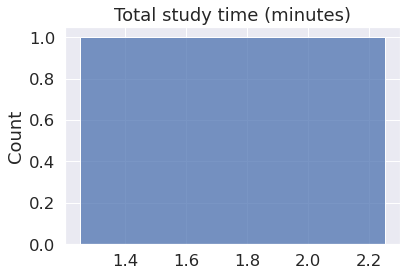

In [20]:
sns.histplot(pd.concat([response_df, qualitative_df]).groupby("uniqueid").apply(lambda rows: rows.rt.sum() / 1000 / 60))
plt.title("Total study time (minutes)")

In [21]:
pd.concat([response_df, qualitative_df]).groupby("uniqueid").rt.sum().apply(lambda xs: xs / 1000 / 60).agg(["mean", "std"])

mean    1.751493
std          NaN
Name: rt, dtype: float64

### Response times

In [22]:
# sns.displot(data=response_df, x="rt", hue="uniqueid", kind="hist")

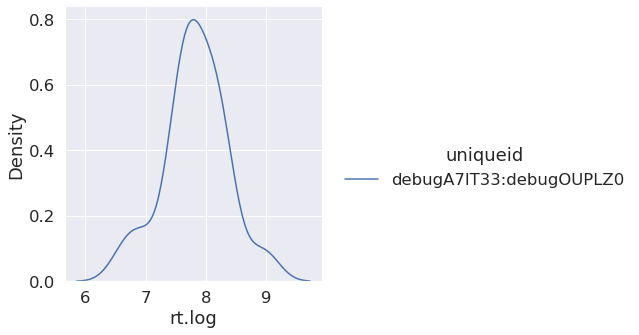

In [23]:
response_df["rt.log"] = np.log(response_df.rt)
sns.displot(data=response_df, x="rt.log", hue="uniqueid", kind="kde")

In [24]:
# sns.lmplot(data=response_df.reset_index(), x="trial_index", y="rt.log", hue="uniqueid", height=10, ci=False)
# plt.title("Log response time vs. trial position")

### How are people using the sliders?

- Stripplot points correspond to individual slider responses.
- Responses are grouped vertically by subject.
- Transparent boxplots indicate filler response value for a particular subject. Red median lines / boxes indicate "full" fillers and blue indicate "empty."
- X marks indicate mean practice response value for a particular subject. Red and blue match above.

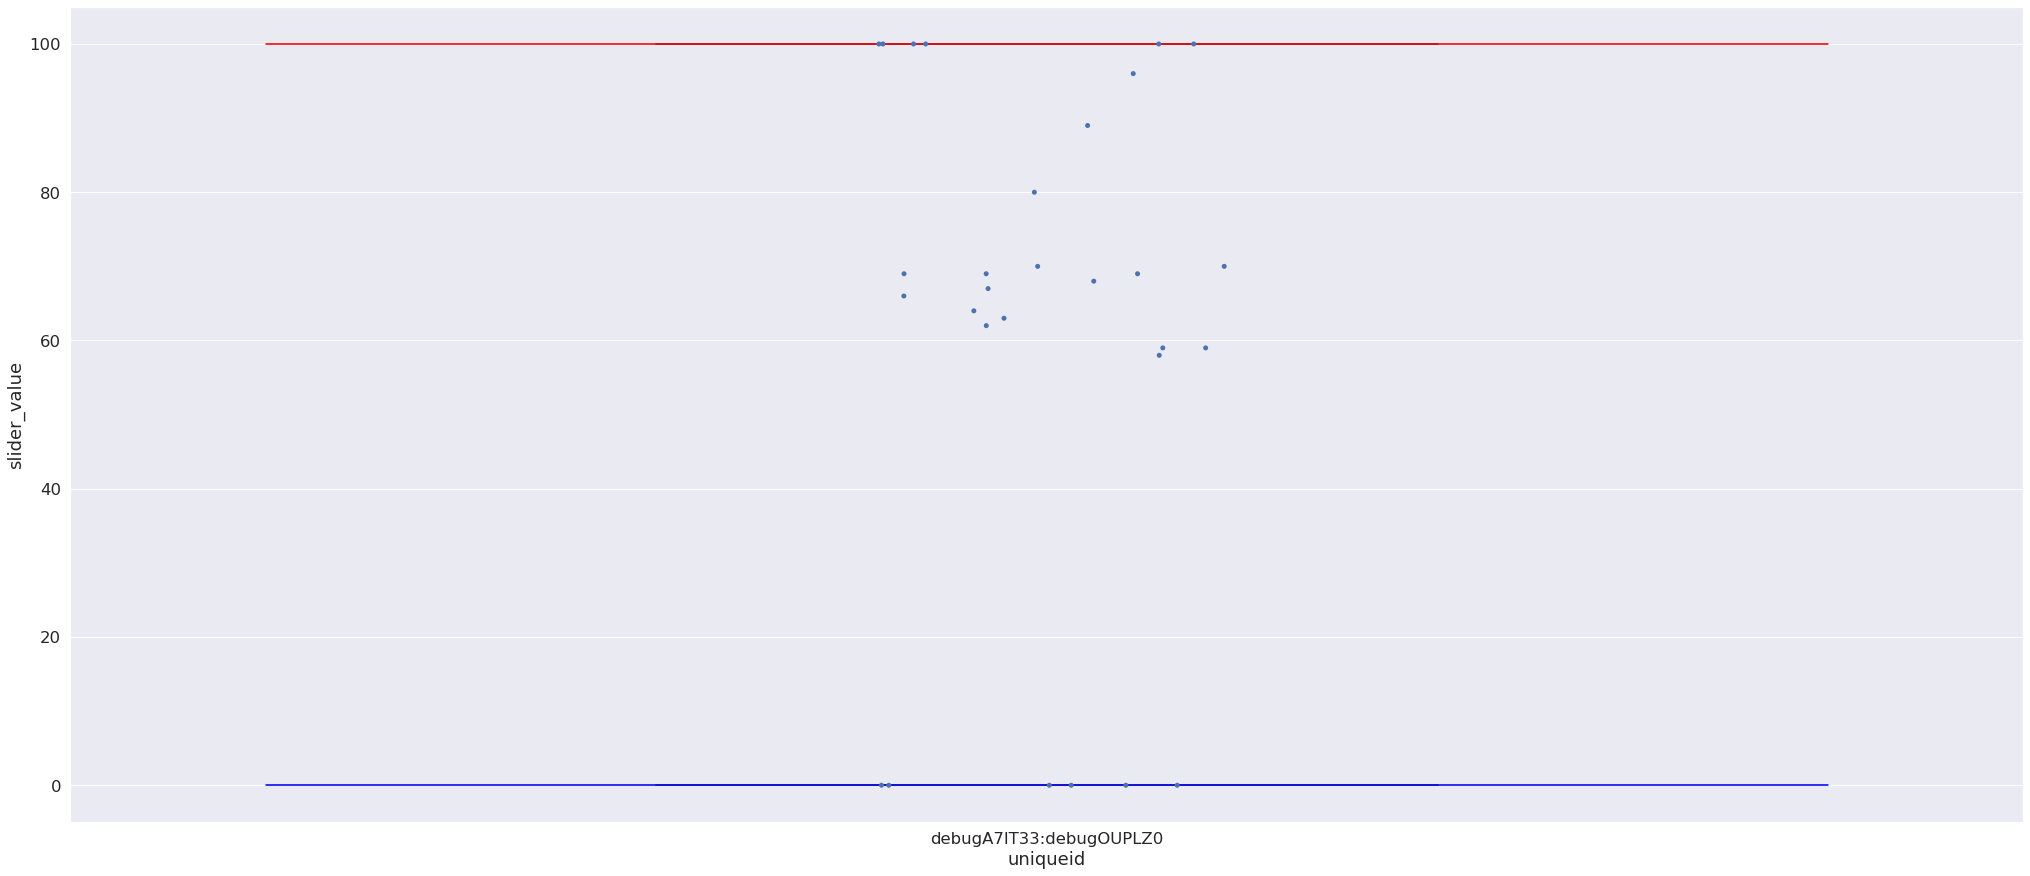

In [25]:
# Order S by descending difference between mean full-filler and empty-filler rating
filler_rows = response_df[response_df.condition_0 == "filler"]
filler_diffs = filler_rows.groupby("uniqueid").apply(lambda xs: xs[xs.condition_1 == "full"].slider_value.mean() - xs[xs.condition_1 == "empty"].slider_value.mean())
subject_order = filler_diffs.sort_values(ascending=False).index

plt.subplots(figsize=(35, 15))
g = sns.stripplot(data=response_df.reset_index(), x="uniqueid", y="slider_value", order=subject_order)

# plot filler responses
sns.boxplot(data=response_df[(response_df.condition_0 == "filler") & (response_df.condition_1 == "full")].reset_index(),
            x="uniqueid", y="slider_value", order=subject_order,
            color="red", medianprops=dict(color="red"), flierprops=dict(markerfacecolor="red"), boxprops=dict(alpha=0.3))
sns.boxplot(data=response_df[(response_df.condition_0 == "filler") & (response_df.condition_1 == "empty")].reset_index(),
            x="uniqueid", y="slider_value", order=subject_order, 
            color="blue", medianprops=dict(color="blue"), flierprops=dict(markerfacecolor="blue"), boxprops=dict(alpha=0.3))

# plot practice responses
practice_full, practice_empty = [], []
for i, subj in enumerate(subject_order):
    subj_rows = response_df.xs(subj, level="uniqueid")
    subj_rows = subj_rows[(subj_rows.condition_0 == "practice")]
    practice_full.append(subj_rows[subj_rows.condition_2 == "full"].slider_value.mean())
    practice_empty.append(subj_rows[subj_rows.condition_2 == "empty"].slider_value.mean())
    
g.plot(np.arange(len(subject_order)), practice_full, marker="x", markersize=10, color="red", linestyle="none")
g.plot(np.arange(len(subject_order)), practice_empty, marker="x", markersize=10, color="blue", linestyle="none")

## Attention checks

### Practice round

In [26]:
practice_df = response_df[response_df.condition_0 == "practice"]
practice_df["match"] = practice_df.apply(lambda r: r.slider_value > 50 if r.condition_2 == "full" else r.slider_value <= 50, axis=1)
practice_df["practice_id"] = practice_df.condition_1.str.cat(practice_df.condition_2)

/tmp/ipykernel_93/3679604798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  practice_df["match"] = practice_df.apply(lambda r: r.slider_value > 50 if r.condition_2 == "full" else r.slider_value <= 50, axis=1)
/tmp/ipykernel_93/3679604798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  practice_df["practice_id"] = practice_df.condition_1.str.cat(practice_df.condition_2)


In [27]:
# Ignore evaluating practice items which retrospectively don't seem like good practice items...
PRACTICE_IGNORE = {"solidempty", "abstractempty"}

practice_df = practice_df[~practice_df.practice_id.isin(PRACTICE_IGNORE)]

#### Practice failures by item

In [28]:
practice_df.groupby("practice_id").match.mean()

practice_id
abstractfull    0.0
liquidfull      0.0
solidfull       0.0
Name: match, dtype: float64

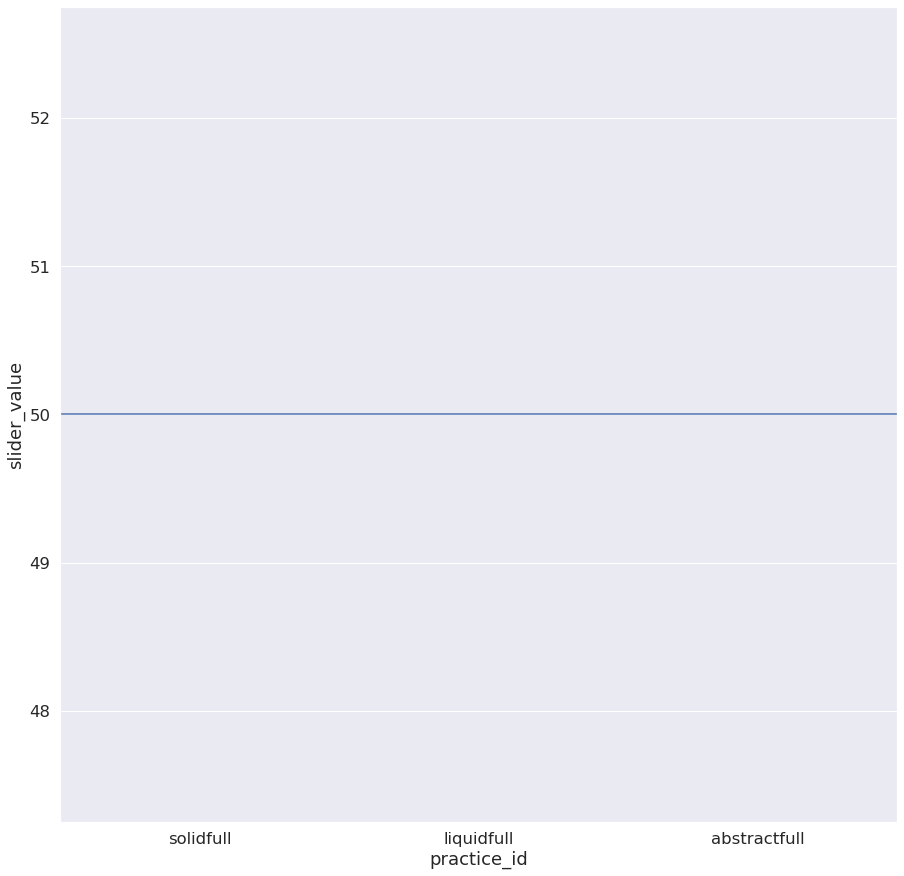

In [29]:
plt.subplots(figsize=(15,15))
sns.swarmplot(data=practice_df.reset_index(), x="practice_id", y="slider_value")
plt.axhline(50)

#### Practice copouts

In [30]:
practice_df.groupby("practice_id").slider_copout.agg(["mean", "count"]).sort_values("mean", ascending=False)

,mean,count
practice_id,,
abstractfull,1.0,1
liquidfull,1.0,1
solidfull,1.0,1


### Fillers

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


<AxesSubplot:xlabel='t'>

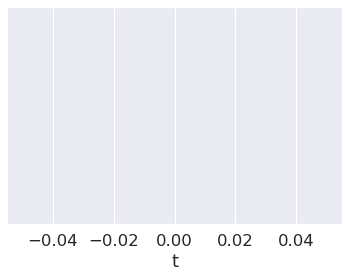

In [31]:
from scipy.stats import ttest_ind
def compute_filler_ttest(subj_rows):
    """
    sanity check: "full" items should be rated higher than "empty" filler items
    """
    filler_rows = subj_rows[subj_rows.condition_0 == "filler"]
    
    # Filter out copouts (and print warning -- fillers should not trigger copout)
    copout_rows = filler_rows[filler_rows.slider_copout]
    if len(copout_rows) > 0:
        print(f"WARNING: subject {filler_rows.iloc[0].name} had {len(copout_rows)} filler copout(s). Seems fishy.")
    filler_rows = filler_rows[~filler_rows.slider_copout]
    
    full_filler = filler_rows[filler_rows.condition_1 == "full"]
    empty_filler = filler_rows[filler_rows.condition_1 == "empty"]
    
    return pd.Series(ttest_ind(full_filler.slider_value, empty_filler.slider_value),
                     index=["t", "pval"])

filler_stats = response_df.groupby("uniqueid").apply(compute_filler_ttest)
sns.boxplot(data=filler_stats.reset_index(), x="t", hue="uniqueid")

In [32]:
filler_stats.sort_values("t").head(50)

,t,pval
uniqueid,,
debugA7IT33:debugOUPLZ0,inf,0.0


#### Filler copouts

In [33]:
response_df[response_df.condition_0 == "filler"].groupby(["item_id", "condition_1"]).slider_copout.agg(["mean", "sum", "count"]).sort_values("mean", ascending=False)

,,mean,sum,count
item_id,condition_1,,,
0.0,empty,0.0,0,1
1.0,empty,0.0,0,1
2.0,empty,0.0,0,1
3.0,empty,0.0,0,1
4.0,empty,0.0,0,1
5.0,empty,0.0,0,1
6.0,full,0.0,0,1
7.0,full,0.0,0,1
8.0,full,0.0,0,1


#### Filler failures by item

In [34]:
filler_df = response_df[response_df.condition_0 == "filler"]
filler_df["match"] = filler_df.apply(lambda r: r.slider_value > 50 if r.condition_1 == "full" else r.slider_value <= 50, axis=1)

/tmp/ipykernel_93/2652486730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filler_df["match"] = filler_df.apply(lambda r: r.slider_value > 50 if r.condition_1 == "full" else r.slider_value <= 50, axis=1)


In [35]:
filler_df.groupby(["condition_1", "item_id"]).match.mean()

condition_1  item_id
empty        0.0        1.0
             1.0        1.0
             2.0        1.0
             3.0        1.0
             4.0        1.0
             5.0        1.0
full         6.0        1.0
             7.0        1.0
             8.0        1.0
             9.0        1.0
             10.0       1.0
             11.0       1.0
Name: match, dtype: float64

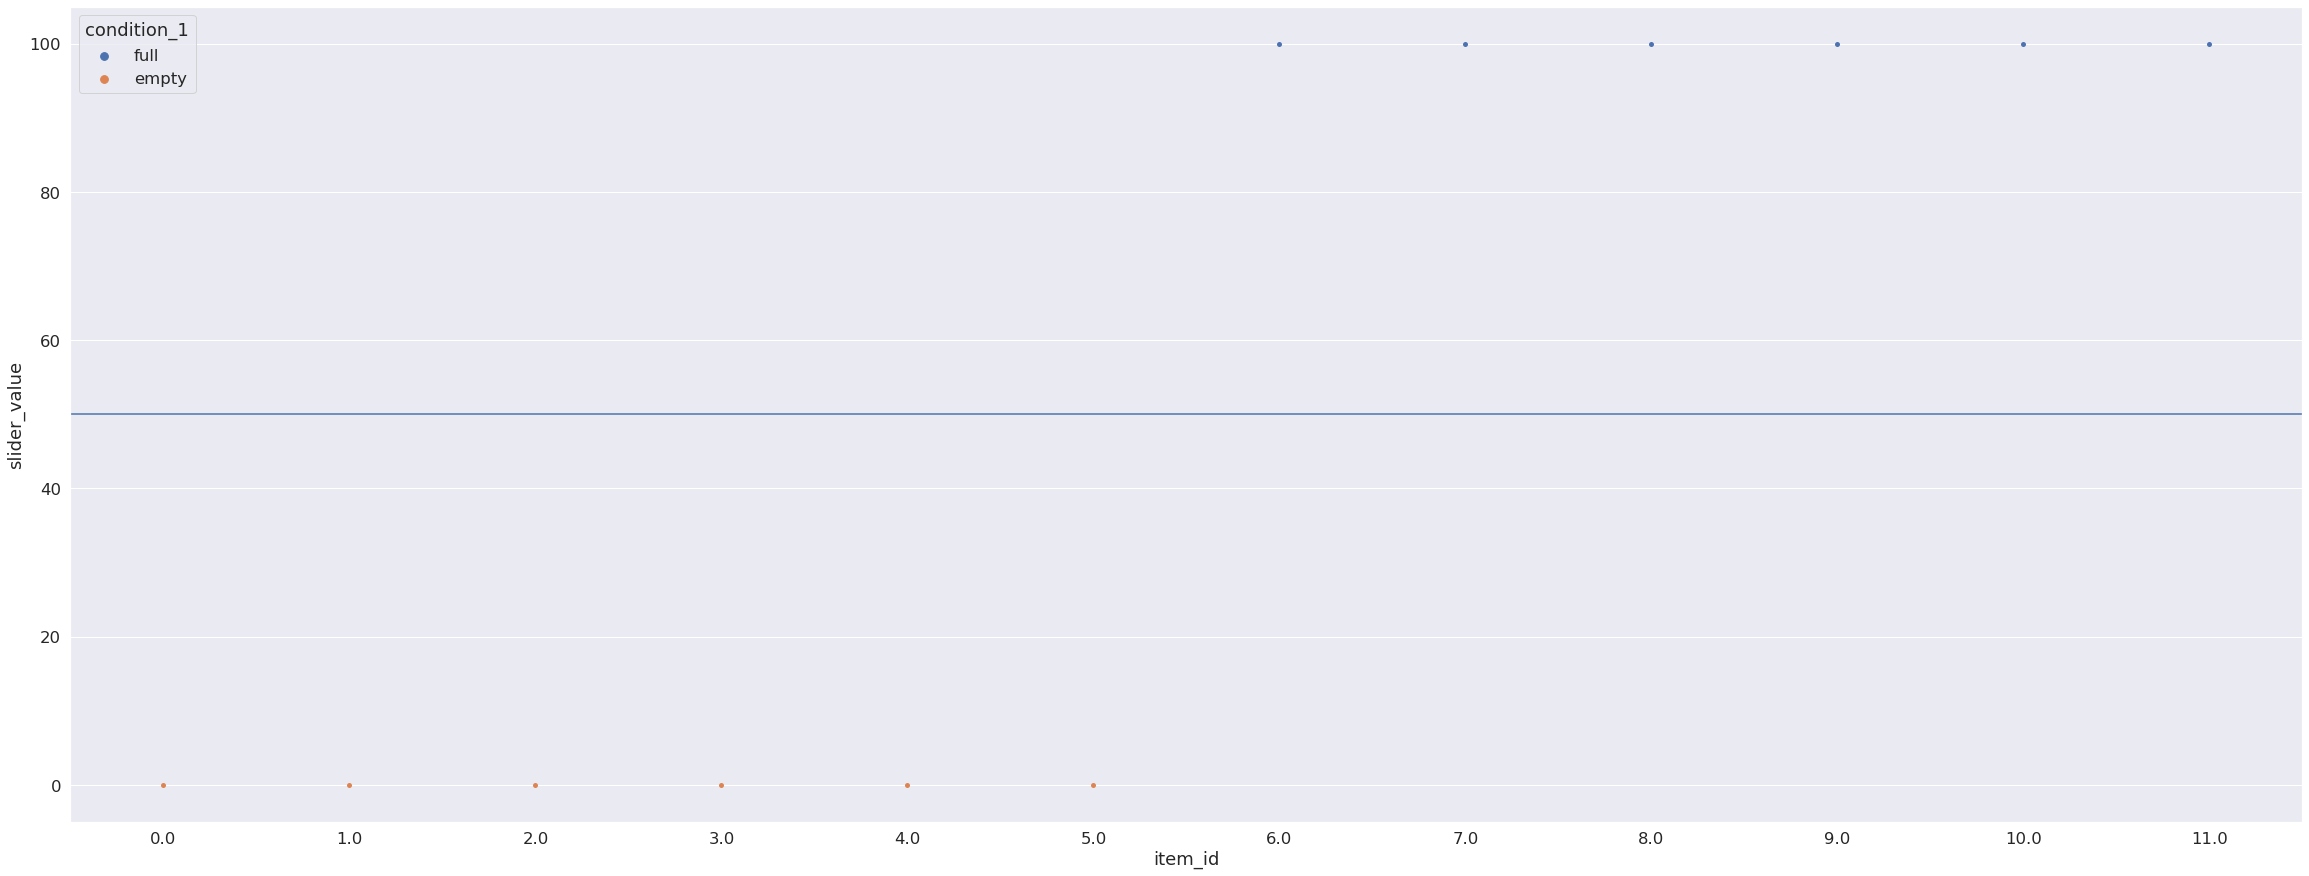

In [36]:
plt.subplots(figsize=(40,15))
# sns.barplot(data=filler_df.reset_index(), x="condition_1", hue="item_id", y="slider_value")
sns.swarmplot(data=filler_df.reset_index(), hue="condition_1", x="item_id", y="slider_value")
plt.axhline(50)

## Final data processing

In [37]:
exp_items = response_df[~(response_df.condition_0.isin(("practice", "filler")))]

### Filter based on practice and attention checks

In [38]:
practice_drops = set(practice_df.groupby("uniqueid").filter(lambda r: r.match.mean() < 0.66).index.get_level_values("uniqueid"))
drop_pct = np.round(len(practice_drops) / N * 100, 1)
print(f"{len(practice_drops)} subjects ({drop_pct}%) disqualified and dropped due to failed practice.")
print("\t" + "\n\t".join(practice_drops))
exp_items = exp_items.drop(practice_drops, level="uniqueid")

attention_drops = filler_stats[(filler_stats.t < 0) | (filler_stats.pval > 1e-1) | filler_stats.t.isna()]
drop_pct = np.round(len(attention_drops) / N * 100, 1)
print(f"{len(attention_drops)} subjects ({drop_pct}%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.")
print("\t" + "\n\t".join(attention_drops.index))
exp_items = exp_items.drop(attention_drops.index, level="uniqueid")

In [39]:
print(f"{len(set(exp_items.index.get_level_values('uniqueid')))} subjects remaining.")

1 subjects remaining.


### Merge in materials

In [40]:
import json
def load_materials(mat):
    with open(f"../../materials/{mat}.json") as f:
        materials = json.load(f)
    return pd.DataFrame.from_records(materials["items"]).rename(columns={"id": "item_id"}).set_index("item_id")

materials_ids = sorted(set(exp_items.materials_id))
materials_df = pd.concat([load_materials(mat) for mat in materials_ids], names=["materials_id"], keys=materials_ids, axis=0)

materials_df["AV"] = materials_df.A.str.cat(materials_df.V, " ")

# NB this doesn't handle fillers correctly

In [41]:
keep_cols = ["A", "V", "L", "AV", "A concrete?", "A countable?", "A animate?"]
merged_df = pd.merge(exp_items, materials_df[keep_cols], left_on=["materials_id", "item_id"], right_index=True)

### Filter out items which were dropped in later materials iterations

In [42]:
# Partition results into those evaluated on latest materials vs. earlier
latest_materials = materials_ids[-1]
latest_merged_df = merged_df[merged_df.materials_id == latest_materials]
earlier_merged_df = merged_df[merged_df.materials_id != latest_materials]

# Get item IDs which appear only in earlier
early_only = set(earlier_merged_df.item_id) - set(latest_merged_df.item_id)

print(f"Dropping {len(early_only)} item results because they weren't included in the latest materials, {materials_ids[-1]}.")
merged_df = merged_df[~merged_df.item_id.isin(early_only)]

Dropping 0 item results because they weren't included in the latest materials, swarm-006-nonalternating-natural.


### Separate control items from critical items

In [43]:
merged_df_critical = merged_df[~merged_df.is_nonalternating_control]
merged_df_control = merged_df[merged_df.is_nonalternating_control]

### Export

In [44]:
merged_df.to_csv("merged_df.csv")

## Basic visualization: construction meaning

In [45]:
# Compute by-item slider difference of means between conditions
def compute_item_difference(item_rows):
    item_rows = item_rows.set_index("agent_is_subject")
    
    if True not in item_rows.index or False not in item_rows.index:
        return np.nan
    
    agent_rows, location_rows = item_rows.loc[True], item_rows.loc[False]
    return location_rows.slider_value_normed.mean() - agent_rows.slider_value_normed.mean()

item_differences = merged_df_critical.groupby(["item_id", "A", "V", "L", "A concrete?", "A countable?", "A animate?"]) \
    .apply(compute_item_difference) \
    .rename("LocationSubject - AgentSubject")

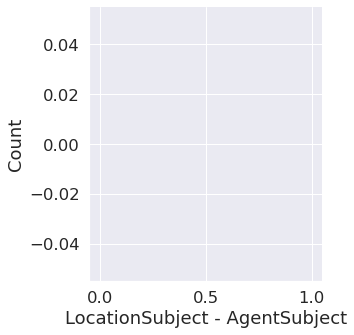

In [46]:
sns.displot(item_differences, bins=12)

In [47]:
item_differences.sort_values(ascending=False)

item_id  A             V       L             A concrete?  A countable?  A animate?
0.0      bees          swarm   garden        True         True          True         NaN
3.0      trumpets      ring    concert hall  True         True          False        NaN
4.0      people        bustl   square        True         True          True         NaN
6.0      terror        cours   body          False        False         False        NaN
7.0      excitement    crackl  theater       False        False         False        NaN
19.0     bubbles       foam    tub           True         True          False        NaN
22.0     lights        glow    sky           True         True          False        NaN
31.0     excitement    puls    temples       False        False         False        NaN
39.0     sewage        runn    street        True         False         False        NaN
41.0     trepidation   shak    chest         False        False         False        NaN
56.0     tadpoles      swim

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'tadpoles swimm'),
  Text(1, 0, 'trumpets ring'),
  Text(2, 0, 'lights glow'),
  Text(3, 0, 'people bustl'),
  Text(4, 0, 'terror cours'),
  Text(5, 0, 'bees swarm'),
  Text(6, 0, 'worms wriggl'),
  Text(7, 0, 'sewage runn'),
  Text(8, 0, 'trepidation shak'),
  Text(9, 0, 'bubbles foam'),
  Text(10, 0, 'anticipation tingl'),
  Text(11, 0, 'excitement puls'),
  Text(12, 0, 'excitement crackl')])

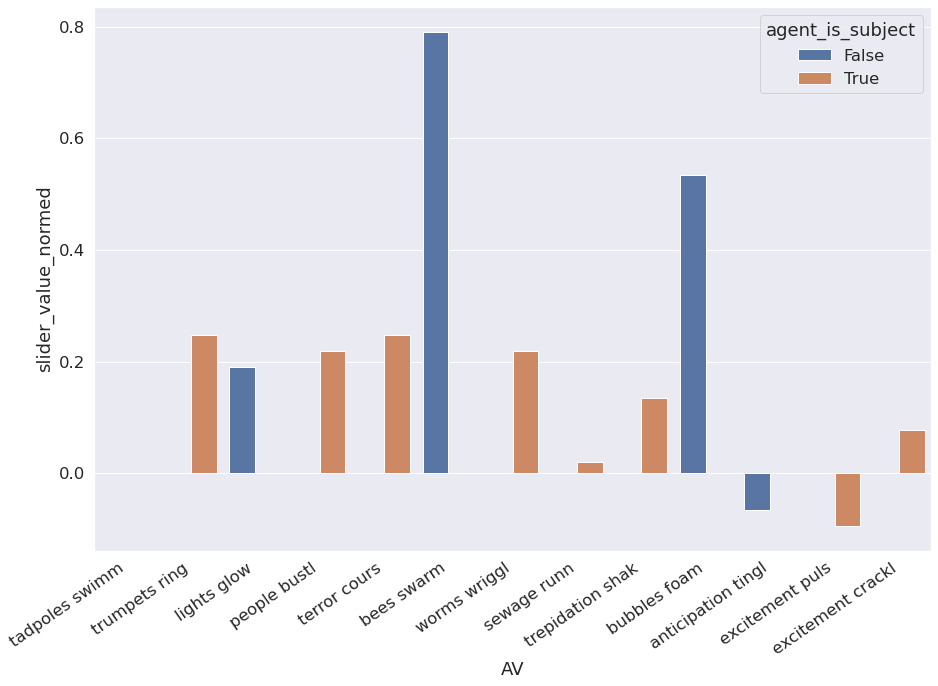

In [48]:
plt.subplots(figsize=(15, 10))
sns.barplot(data=merged_df_critical.reset_index(), x="AV", hue="agent_is_subject", y="slider_value_normed")
plt.xticks(rotation=35, ha="right")

<AxesSubplot:xlabel='A concrete?', ylabel='LocationSubject - AgentSubject'>

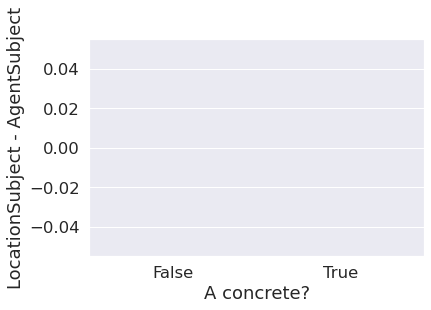

In [49]:
sns.barplot(data=item_differences.reset_index(), x="A concrete?", y="LocationSubject - AgentSubject")

<AxesSubplot:xlabel='A countable?', ylabel='LocationSubject - AgentSubject'>

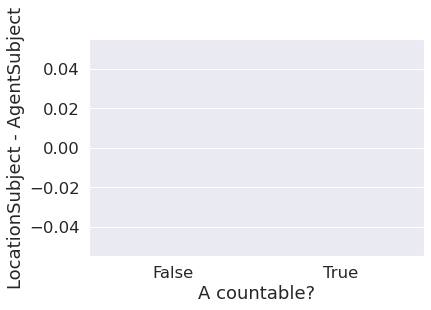

In [50]:
sns.barplot(data=item_differences.reset_index(), x="A countable?", y="LocationSubject - AgentSubject")

<AxesSubplot:xlabel='A animate?', ylabel='LocationSubject - AgentSubject'>

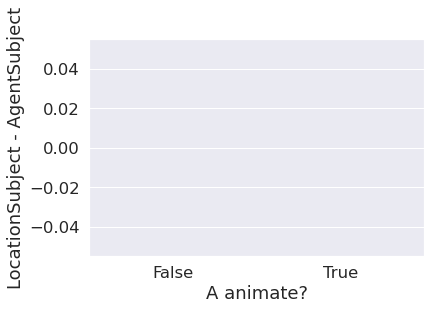

In [51]:
sns.barplot(data=item_differences.reset_index(), x="A animate?", y="LocationSubject - AgentSubject")

### Copouts

In [52]:
copouts = merged_df.groupby(["materials_id", "item_id"]).apply(lambda subj_rows: subj_rows.slider_copout.astype(bool).mean())

In [53]:
copouts = merged_df.groupby(["materials_id", "item_id", "agent_is_given", "agent_is_subject", "is_nonalternating_control"] + keep_cols) \
    .apply(lambda rows: rows.slider_copout.astype(bool).agg(["sum", "count"]))
copouts = copouts.groupby(["item_id", "agent_is_given", "agent_is_subject", "is_nonalternating_control"]).sum()
copouts["mean"] = copouts["sum"].div(copouts["count"])
copouts.sort_values("mean", ascending=False)

,,,slider_copout,sum,count,mean
item_id,agent_is_given,agent_is_subject,is_nonalternating_control,,,
56.0,True,False,False,1,1,1.0
0.0,True,False,False,0,1,0.0
3.0,True,True,False,0,1,0.0
4.0,True,True,False,0,1,0.0
6.0,False,True,False,0,1,0.0
7.0,False,True,False,0,1,0.0
19.0,False,False,False,0,1,0.0
22.0,True,False,False,0,1,0.0
31.0,True,True,False,0,1,0.0


<AxesSubplot:xlabel='A', ylabel='slider_copout'>

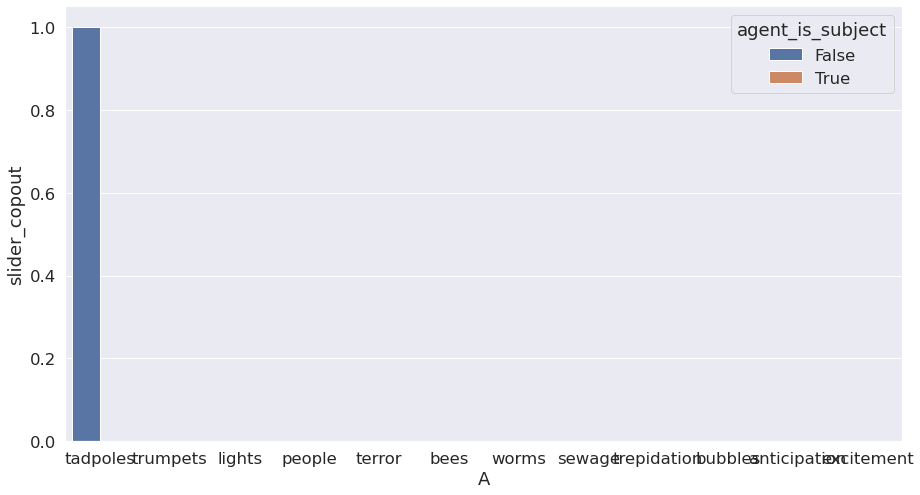

In [54]:
plt.subplots(figsize=(15, 8))
sns.barplot(data=merged_df_critical, x="A", y="slider_copout", hue="agent_is_subject")

<AxesSubplot:xlabel='A concrete?', ylabel='slider_copout'>

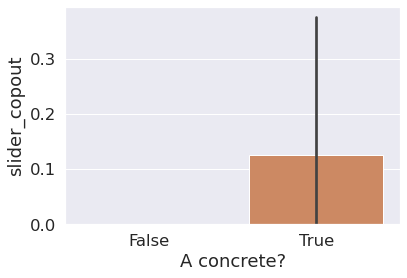

In [55]:
sns.barplot(data=merged_df_critical, x="A concrete?", y="slider_copout")

<AxesSubplot:xlabel='A countable?', ylabel='slider_copout'>

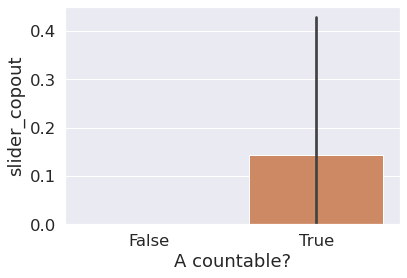

In [56]:
sns.barplot(data=merged_df_critical, x="A countable?", y="slider_copout")

## Item exposure

In [57]:
merged_df.groupby(["item_id", "A", "agent_is_given", "agent_is_subject", "is_nonalternating_control"]).size().sort_values().head(20)

item_id  A             agent_is_given  agent_is_subject  is_nonalternating_control
0.0      bees          True            False             False                        1
3.0      trumpets      True            True              False                        1
4.0      people        True            True              False                        1
6.0      terror        False           True              False                        1
7.0      excitement    False           True              False                        1
19.0     bubbles       False           False             False                        1
22.0     lights        True            False             False                        1
31.0     excitement    True            True              False                        1
39.0     sewage        False           True              False                        1
41.0     trepidation   True            True              False                        1
56.0     tadpoles      True          

## Basic visualization: givenness manipulation

In [58]:
# Compute by-item slider difference of means between conditions
def compute_item_difference(item_rows):
    item_rows = item_rows.set_index("agent_is_subject")
    
    if True not in item_rows.index or False not in item_rows.index:
        return np.nan
    
    agent_rows, location_rows = item_rows.loc[True], item_rows.loc[False]
    return location_rows.slider_value_normed.mean() - agent_rows.slider_value_normed.mean()

item_differences = merged_df_critical.groupby(["item_id", "A", "V", "L", "AV", "A concrete?", "A countable?", "agent_is_given"]) \
    .apply(compute_item_difference) \
    .rename("LocationSubject - AgentSubject")

In [59]:
item_differences.sort_values()

item_id  A             V       L             AV                  A concrete?  A countable?  agent_is_given
0.0      bees          swarm   garden        bees swarm          True         True          True             NaN
3.0      trumpets      ring    concert hall  trumpets ring       True         True          True             NaN
4.0      people        bustl   square        people bustl        True         True          True             NaN
6.0      terror        cours   body          terror cours        False        False         False            NaN
7.0      excitement    crackl  theater       excitement crackl   False        False         False            NaN
19.0     bubbles       foam    tub           bubbles foam        True         True          False            NaN
22.0     lights        glow    sky           lights glow         True         True          True             NaN
31.0     excitement    puls    temples       excitement puls     False        False         True      

<AxesSubplot:xlabel='agent_is_given', ylabel='LocationSubject - AgentSubject'>

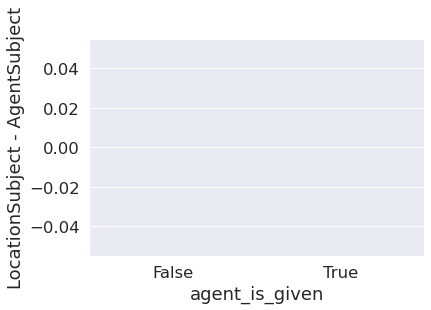

In [60]:
sns.barplot(data=item_differences.reset_index(), x="agent_is_given", y="LocationSubject - AgentSubject")

<AxesSubplot:xlabel='agent_is_subject', ylabel='slider_value_normed'>

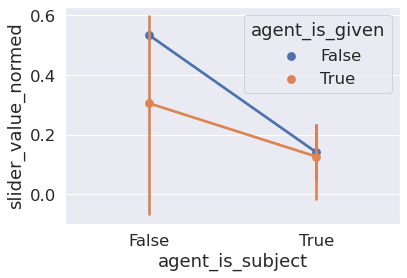

In [61]:
sns.pointplot(data=merged_df_critical.reset_index(), x="agent_is_subject", y="slider_value_normed", hue="agent_is_given")

<AxesSubplot:xlabel='Construction', ylabel='Normalized slider response'>

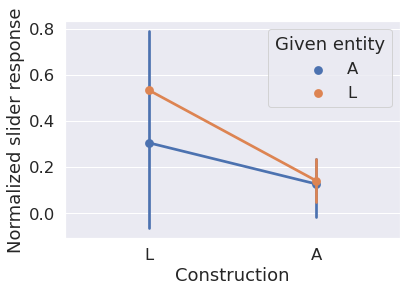

In [62]:
to_plot = merged_df_critical.copy()
to_plot["Construction"] = to_plot.agent_is_subject.map({False: "L", True: "A"})
to_plot["Given entity"] = to_plot.agent_is_given.map({False: "L", True: "A"})
to_plot["Normalized slider response"] = to_plot.slider_value_normed
sns.pointplot(data=to_plot.reset_index(), x="Construction", y="Normalized slider response", hue="Given entity")

<AxesSubplot:xlabel='agent_is_subject', ylabel='slider_value_normed'>

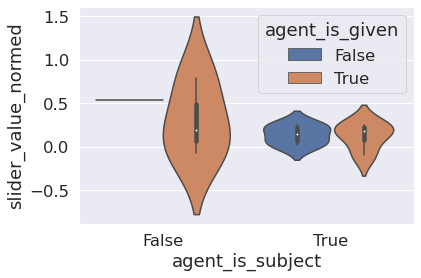

In [63]:
sns.violinplot(data=merged_df_critical.reset_index(), x="agent_is_subject", y="slider_value_normed", hue="agent_is_given")

In [64]:
merged_df_critical.groupby(["agent_is_subject", "agent_is_given"]).slider_value_normed.agg(["mean", "std"])

mean       std
agent_is_subject agent_is_given                    
False            False           0.533880       NaN
                 True            0.305355  0.439760
True             False           0.141104  0.110326
                 True            0.126821  0.155369

In [65]:
merged_df_critical.groupby(["agent_is_subject", "agent_is_given"]).slider_value.agg(["mean", "std", "sem"])

mean        std       sem
agent_is_subject agent_is_given                            
False            False           80.00        NaN       NaN
                 True            72.00  15.394804  8.888194
True             False           66.25   3.862210  1.931105
                 True            65.75   5.439056  2.719528

### Split by concreteness

<AxesSubplot:xlabel='A concrete?', ylabel='LocationSubject - AgentSubject'>

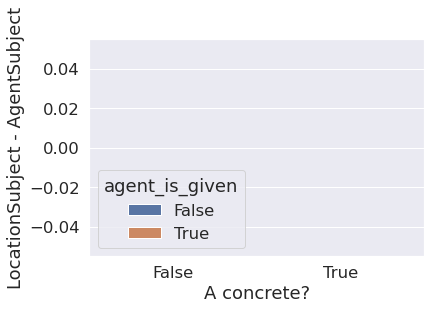

In [66]:
sns.barplot(data=item_differences.reset_index(), x="A concrete?", y="LocationSubject - AgentSubject", hue="agent_is_given")

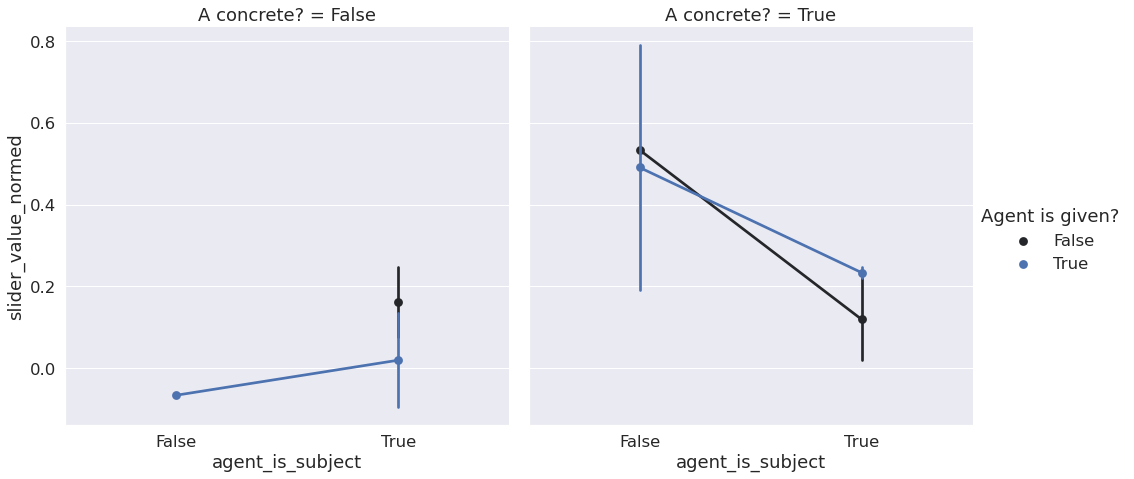

In [67]:
g = sns.FacetGrid(data=merged_df_critical.reset_index(), col="A concrete?", height=7)
g.map(sns.pointplot, "agent_is_subject", "slider_value_normed", "agent_is_given", order=[False, True], hue_order=[False, True]).add_legend(title="Agent is given?")

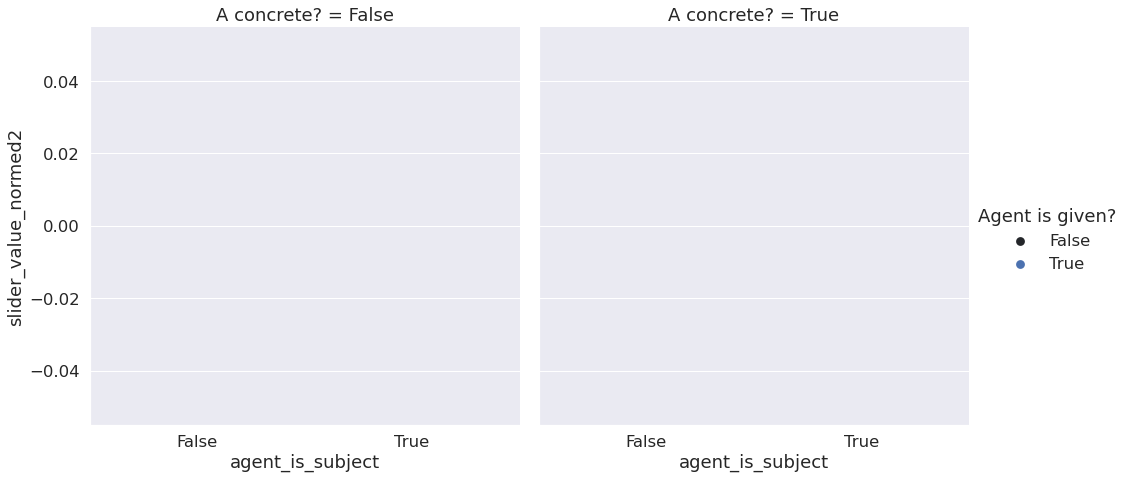

In [68]:
graphdf = merged_df_critical.copy()
graphdf["slider_value_normed2"] = graphdf.groupby('item_id').slider_value_normed.transform(lambda xs: (xs - xs.mean()) / xs.std())
g = sns.FacetGrid(data=graphdf.reset_index(), col="A concrete?", height=7)
g.map(sns.pointplot, "agent_is_subject", "slider_value_normed2", "agent_is_given", order=[False, True], hue_order=[False, True]).add_legend(title="Agent is given?")

In [69]:
merged_df_critical.groupby("A concrete?").apply(
    lambda rows: ttest_ind(rows[rows.agent_is_given & ~rows.agent_is_subject & ~rows.slider_copout].slider_value_normed,
                           rows[~rows.agent_is_given & ~rows.agent_is_subject & ~rows.slider_copout].slider_value_normed))

A concrete?
False    (-1.52127765851133, 0.2255381348644809)
True     (0.496929346597888, 0.6403144845128561)
dtype: object

In [70]:
merged_df_critical.groupby(["A concrete?", "agent_is_subject"]).apply(
    lambda rows: ttest_ind(rows[rows.agent_is_given & ~rows.slider_copout].slider_value_normed,
                           rows[~rows.agent_is_given & ~rows.slider_copout].slider_value_normed))

/opt/conda/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


A concrete?  agent_is_subject
False        False                                             (nan, nan)
             True                             (-1.0, 0.42264973081037427)
True         False                                             (nan, nan)
             True                (1.1313708498984762, 0.3753049524455756)
dtype: object

### Split by item

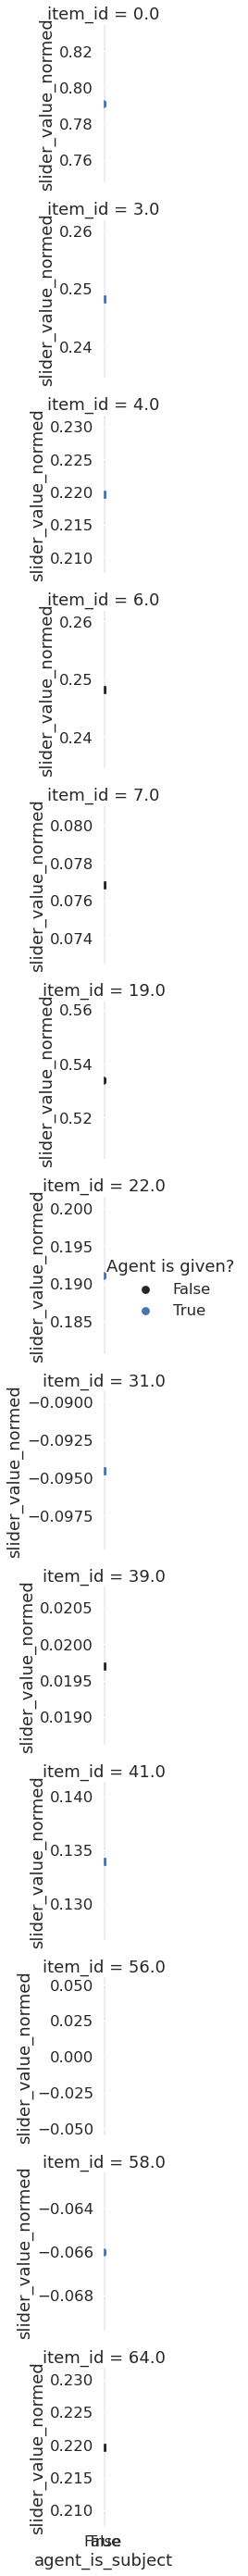

In [71]:
g = sns.FacetGrid(data=merged_df_critical.reset_index(), row="item_id", sharey=False)
g.map(sns.pointplot, "agent_is_subject", "slider_value_normed", "agent_is_given", order=[False, True], hue_order=[False, True])
g.add_legend(title="Agent is given?")
# sns.pointplot(data=merged_df.reset_index(), x="agent_is_subject", y="slider_value_normed", hue="agent_is_given")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'anticipation tingl'),
  Text(1, 0, 'bees swarm'),
  Text(2, 0, 'bubbles foam'),
  Text(3, 0, 'excitement crackl'),
  Text(4, 0, 'excitement puls'),
  Text(5, 0, 'lights glow'),
  Text(6, 0, 'people bustl'),
  Text(7, 0, 'sewage runn'),
  Text(8, 0, 'tadpoles swimm'),
  Text(9, 0, 'terror cours'),
  Text(10, 0, 'trepidation shak'),
  Text(11, 0, 'trumpets ring'),
  Text(12, 0, 'worms wriggl')])

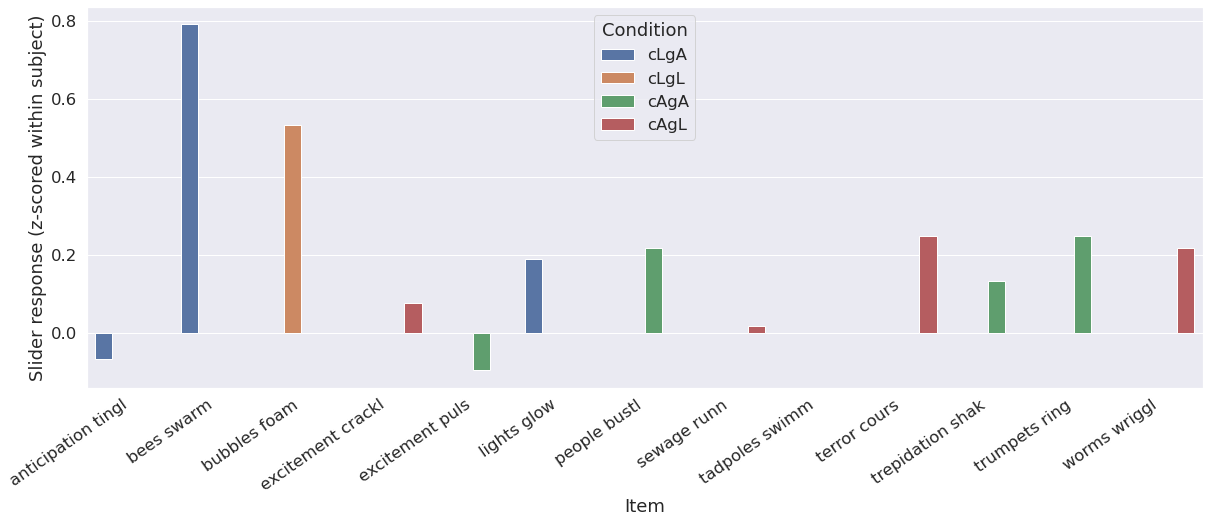

In [72]:
plt.subplots(figsize=(20, 7))
to_plot = merged_df_critical.copy()
to_plot["c"] = to_plot.agent_is_subject.map({False: "L", True: "A"})
to_plot["g"] = to_plot.agent_is_given.map({False: "L", True: "A"})
to_plot["Condition"] = "c" + to_plot.c.str.cat("g" + to_plot.g)

order = to_plot.groupby("AV").apply(lambda xs: xs[xs.Condition == "cLgA"].slider_value_normed.mean() - xs[xs.Condition == "cAgL"].slider_value_normed.mean()).sort_values(ascending=False).index

column_mappings = {
    "slider_value_normed": "Slider response (z-scored within subject)",
    "AV": "Item"
}

sns.barplot(data=to_plot.rename(columns=column_mappings),
            x=column_mappings["AV"], hue="Condition", y=column_mappings["slider_value_normed"], order=order, hue_order=["cLgA", "cLgL", "cAgA", "cAgL"])
plt.xticks(rotation=35, ha="right")

## Extras

In [73]:
pd.merge(response_df.xs("A1VX5ZKAT3S8YP:34PGFRQONPZ0JASKSXG0V1FX6U6JWX", level="uniqueid").reset_index()[["trial_index", "materials_id", "item_id", "condition_0", "condition_1", "agent_is_subject", "slider_value"]],
         materials_df[["A", "V", "L"]],
         left_on=["materials_id", "item_id"], right_index=True).sort_values("agent_is_subject")

KeyError: 'A1VX5ZKAT3S8YP:34PGFRQONPZ0JASKSXG0V1FX6U6JWX'

In [ ]:
exp_items[(exp_items.condition_0 != "filler") & (exp_items.item_id == 3)][["agent_is_subject", "slider_value_normed"]].sort_values(["agent_is_subject", "slider_value_normed"])